# Example use of Savitzky-Golay Filter

In [1]:
using SavitzkyGolay
using Plots; plotlyjs() # This is for visualization purposes, not required for the SG package itself. Use PlotlyJS backend

WebIO._IJuliaInit()

Plots.PlotlyJSBackend()

# Example 1
Trivial example; filtered signal is the same as original

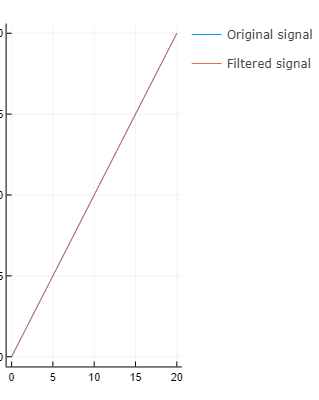

In [2]:
t = 0:20
y = collect(0:20)
sg = savitzky_golay(y, 11, 2) # args: vector, window size, order of poly to fit
savitzky_golay()
plot(t, [y sg.y], label=["Original signal" "Filtered signal"])

# Example 2
Exponential function with some random noise

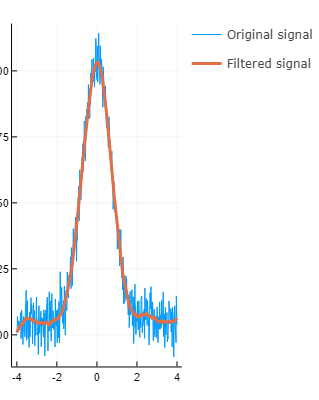

In [3]:
t = LinRange(-4, 4, 500)
y = exp.(-t.^2) .+ 0.05 .* (1.0 .+ randn(length(t)))
sg = savitzky_golay(y, 81, 2)
plot(t, y, label="Original signal")
plot!(t, sg.y, linewidth=3, label="Filtered signal")

# Example 3
Derivative of the input signal

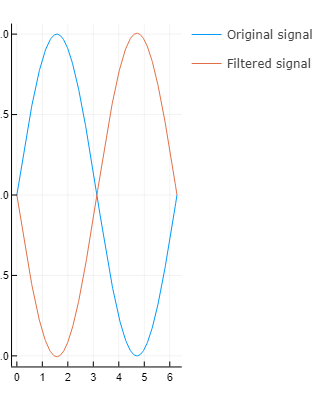

In [5]:
stop = 2*pi; l=360; d=2;

t = LinRange(0, stop, l)
y = collect(sin.(t))
sg = savitzky_golay(y, 5, 3, deriv=d)
plot(t, [y (l/stop)^d*sg.y], label=["Original signal" "Filtered signal"])

# Example 4
Derivative of an input signal (polynomial) containing noise

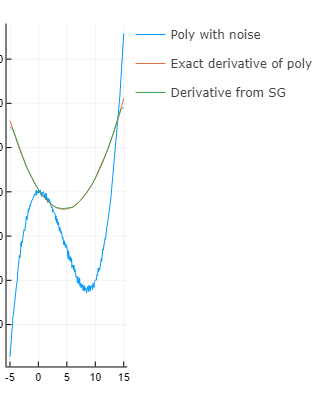

In [13]:
start = -5; stop = 15; le=300; ord=2;

x = LinRange(start, stop, le)
y = 0.15*x.^3 - 2*x.^2 .+ x  .+ randn(length(x))
y1 = 0.45*x.^2 - 4*x .+ 1 # first derivative
sg = savitzky_golay(y, 41, ord, deriv=1)
plot(x, [y y1 le/(stop-start)^der*sg.y], label=["Poly with noise" "Exact derivative of poly" "Derivative from SG"], legend_position = :bottomleft)

## Use of 'Rate' parameter instead of scaling as per above

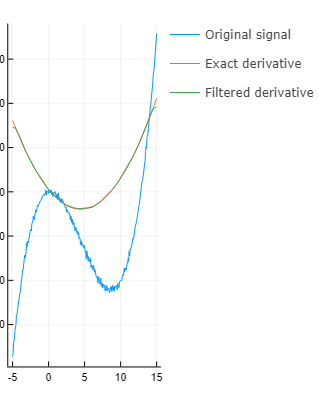

In [14]:
sg = savitzky_golay(y, 41, ord, deriv=der, rate=le/(stop-start)^der)
sgyd = sg.y;
plot(x, [y y1 sgyd], label=["Original signal" "Exact derivative" "Filtered derivative"], legend_position = :bottomleft)

## Finite difference of filtered input
Instead of using the SG filter to determine the derivative, filter (smoothen) the input and then take the derivative by means of simple finite differences.

In [15]:
function derivative(x, y)
    dydx = zeros(size(x))
    for i in 2:length(x) - 1
        dydx[i] = (y[i+1] - y[i-1]) / (1 * (x[i+1] - x[i-1]))
    end
    dydx[1] = NaN
    dydx[end] = NaN
    return dydx
end

derivative (generic function with 1 method)

In [16]:
sg = savitzky_golay(y, 41, 2);
yf = sg.y;

In [17]:
dyfdx = derivative(x, yf);

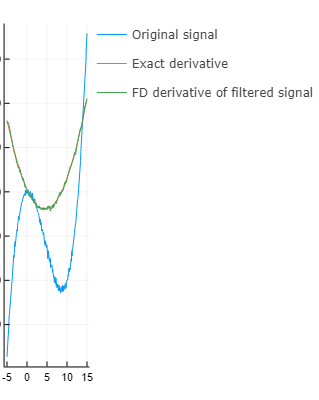

In [18]:
plotfd = plot(x, [y y1 dyfdx], label=["Original signal" "Exact derivative" "FD derivative of filtered signal"],
    legend_position = :bottomleft)

## Comparison of derivatives

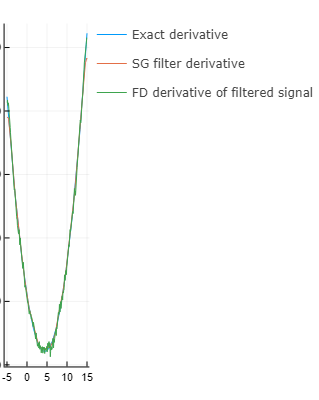

In [19]:
plot(x, [y1 sgyd dyfdx], label=["Exact derivative" "SG filter derivative" "FD derivative of filtered signal"], legend_position = :top)

# Maths

``
$$
  \int_0^\infty \frac{x^3}{e^x-1}\,dx = \frac{\pi^4}{15}
$$
``

$$
  \int_0^\infty \frac{x^3}{e^x-1}\,dx = \frac{\pi^4}{15}
$$